# Chapter 5. Monte Carlo
## Example 5.1: Blackjack
Íµ¨ÌòÑÌïòÎ†§Î©¥ Î¨∏Ï†úÎ•º Ïûò ÏùΩÏñ¥Ïïº Í≤†ÏßÄÏöî? Ï≤úÏ≤úÌûà Î®ºÏ†Ä ÏùΩÏñ¥ Î≥¥ÏÑ∏Ïöî. 

Î¨∏Ï†úÏóêÏÑú "Rewards of -1, +1, and 0". ÎùºÍ≥† ÌïòÏòÄÏúºÎ©∞, $\gamma$=1Ïù¥Í≥†, hitÍ≥º stick Ïóê Îî∞Î•∏ Î≥¥ÏÉÅÏùÄ 0ÏûÖÎãàÎã§. Ï¶â ÏäπÌå®Í∞Ä ReturnÏù¥ Îê©ÎãàÎã§. 

### 1. First-visit MC prediction, for estimating V

Fixed Policy(Í≥†Ï†ï Ï†ïÏ±Ö?) ÏûÑÏùÑ Ïú†ÏùòÌï¥ÏÑú ÏΩîÎìúÎ•º ÏùΩÏñ¥ Î≥¥ÏÑ∏Ïöî. Í≥†Ï†ï Ï†ïÏ±ÖÏùÑ Îî∞Î•¥Î©∞ ÏÉÅÌÉúÎì§Îßå Í∏∞Î°ùÌïòÍ≥† ÎßàÏßÄÎßâ Î≥¥ÏÉÅ ÌïòÎÇòÎ•º Î∞òÌôòÌï©ÎãàÎã§. 

In [3]:
import random
from collections import defaultdict

# -----------------------------
# Î∏îÎûôÏû≠ ÌôòÍ≤Ω Ï†ïÏùò
# -----------------------------
def draw_card():
    r = random.randint(1, 13)
    if r == 1:   # Ace
        return 1
    elif 2 <= r <= 10:
        return r
    else:        # J, Q, K
        return 10

def usable_ace(hand):
    return 1 in hand and sum(hand) + 10 <= 21

def hand_value(hand):
    val = sum(hand)
    if 1 in hand and val + 10 <= 21:
        return val + 10
    return val

def is_bust(hand):
    return hand_value(hand) > 21

def policy_fixed(player_sum):
    return 'stick' if player_sum >= 20 else 'hit'

def dealer_policy(dealer_sum):
    return 'stick' if dealer_sum >= 17 else 'hit'

def step_player(player, action):
    if action == 'hit':
        player = player + [draw_card()]
        return player, is_bust(player)
    elif action == 'stick':
        return player, False

def play_dealer(dealer):
    while dealer_policy(hand_value(dealer)) == 'hit':
        dealer += [draw_card()]
    return dealer

def outcome(player, dealer):
    if is_bust(player):
        return -1
    if is_bust(dealer):
        return +1
    p, d = hand_value(player), hand_value(dealer)
    if p > d: return +1
    elif p == d: return 0
    else: return -1

def generate_episode_fixed_policy(): 
    player = [draw_card(), draw_card()] # ÌîåÎ†àÏù¥Ïñ¥ Ï¥àÍ∏∞ Ïπ¥Îìú Îëê Ïû• Î∞õÍ≥†,
    dealer = [draw_card(), draw_card()] # ÎîúÎü¨ Ï¥àÍ∏∞ Ïπ¥Îìú Îëê Ïû• Î∞õÍ≥†,
    dealer_up = dealer[0] # ÎîúÎü¨Îäî Ïπ¥ÎìúÎ•º Í≥µÍ∞úÌï©ÎãàÎã§.

    states = []
    while True:
        p_sum = hand_value(player) # ACEÏùò Ï†ïÏùò Î∞©Î≤ïÏóê Îî∞Îùº Ïà´ÏûêÍ∞Ä Îã¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, 1Í≥º 11 Ï§ë ÏÑ†ÌÉùÌïòÏó¨ ÏµúÏÑ†Ïùò Ïà´ÏûêÎ°ú ÌòÑÏû¨ Ïπ¥Îìú Ìï©Í≥Ñ Í∞íÏùÑ ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§. 
        if p_sum < 12: # Î¨¥Ï°∞Í±¥ hit Ìï©ÎãàÎã§(ÍµêÍ≥ºÏÑúÏóêÏÑú ÏÉÅÌÉúÎ•º Ï†ïÏùòÌïú Î∞©Î≤ïÏúºÎ°ú, Î¨∏Ï†ú Ï†ïÏùòÏóê Îî∞Îùº 12 ÎØ∏ÎßåÏùÄ Î¨¥Ï°∞Í±¥ hitÏù¥ Ïù¥ÎìùÏûÖÎãàÎã§).
            player, bust = step_player(player, 'hit')
            if bust: return states, -1  # bustÎ©¥ ÎßùÌñàÏúºÎãà -1, 
            continue                    # bustÍ∞Ä ÏïÑÎãàÎ©¥ Îã§Ïãú Ï≤òÏùåÎ∂ÄÌÑ∞ ÏßÑÌñâÌï©ÎãàÎã§.
        state = (p_sum, dealer_up, usable_ace(player)) # ÏÉÅÌÉúÎäî ÏÖãÏúºÎ°ú Ï†ïÏùòÌï©ÎãàÎã§. ÌòÑÏû¨ ÎÇ¥ Îç±Ïùò Ïπ¥Îìú Ìï©(p_sum), ÎîúÎü¨Ïùò Í≥µÍ∞ú Ïπ¥Îìú(dealer_up), Í∑∏Î¶¨Í≥† ÎÇ¥Í∞Ä ACEÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ Ïó¨Î∂Ä(usable_ace)ÏûÖÎãàÎã§.
        action = policy_fixed(p_sum)    # ÍµêÏû¨ ÏòàÏ†ú Ï†ïÏ±ÖÏùÑ Îî∞Î¶ÖÎãàÎã§. 20 ÎòêÎäî 21Ïù¥Î©¥ stick, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ hitÎ•º Î∞òÌôòÌï©ÎãàÎã§.
        states.append(state)            # Ïù¥Î≤à ÏùòÏÇ¨Í≤∞Ï†ï ÏãúÏ†êÏùò ÏÉÅÌÉúÎ•º Í∏∞Î°ùÌï©ÎãàÎã§. 
        if action == 'stick':           # Ï†ïÏ±ÖÏù¥ stickÏùÑ ÏÑ†ÌÉùÌïòÎ©¥ ÌîåÎ†àÏù¥Ïñ¥Ïùò ÌÑ¥ÏùÑ Ï¢ÖÎ£åÌïòÍ≥†, ÎîúÎü¨Ïùò ÌÑ¥ÏúºÎ°ú ÎÑòÏñ¥Í∞ëÎãàÎã§.
            break   
        else:                                           # Ï†ïÏ±ÖÏù¥ hitÏù∏ Í≤ΩÏö∞,
            player, bust = step_player(player, 'hit')   # ÌïúÏû•ÏùÑ Îçî Î∞õÏäµÎãàÎã§. 
            if bust: return states, -1

    dealer = play_dealer(dealer)        # ÌîåÎ†àÏù¥Ïñ¥Í∞Ä stick ÌïòÏó¨ Î£®ÌîÑÎ•º Îπ†Ï†∏ÎÇòÏò® Í≤ΩÏö∞ Ïã§ÌñâÎê©ÎãàÎã§. 
    return states, outcome(player, dealer) # outcomeÏùÄ ÌîåÎ†àÏù¥Ïñ¥ÏôÄ ÎîúÎü¨Ïùò ÏµúÏ¢Ö Ìï©Í≥º bust Ïó¨Î∂ÄÎ•º ÎπÑÍµêÌï¥ ÏäπÎ¶¨ +1, Î¨¥ÏäπÎ∂Ä 0, Ìå®Î∞∞ ‚àí1ÏùÑ ÎèåÎ†§Ï§çÎãàÎã§. Î∞òÌôòÎêú (states, G) ÏåçÏùÄ First-visit MC ÏòàÏ∏°ÏóêÏÑú Í∞Å ÏÉÅÌÉúÏùò Î¶¨ÌÑ¥ÏùÑ ÎàÑÏ†Å¬∑ÌèâÍ∑†ÌïòÏó¨ V(s)Î•º Ï∂îÏ†ïÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

# -----------------------------
# First-visit MC prediction
# -----------------------------
def mc_prediction_first_visit(n_episodes=100000):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    V = defaultdict(float)

    for _ in range(n_episodes):
        states, G = generate_episode_fixed_policy()
        seen = set()
        for s in states:
            if s not in seen:
                seen.add(s)
                returns_sum[s] += G
                returns_count[s] += 1

    for s in returns_sum:
        V[s] = returns_sum[s] / returns_count[s]
    return V

V_fixed = mc_prediction_first_visit(500000)
print("ÏòàÏãú: (20, 10, False) ÏÉÅÌÉúÏùò Ï∂îÏ†ï Í∞ÄÏπò =", V_fixed[(20, 10, False)])

ÏòàÏãú: (20, 10, False) ÏÉÅÌÉúÏùò Ï∂îÏ†ï Í∞ÄÏπò = 0.43398853127382414


### 2. Monte Carlo ES (Exploring Starts), for estimating $\pi$

ÌñâÎèôÌïòÎäî Î∞©ÏãùÏùÑ ÏÉàÎ°ú Î∞∞Ïõ†ÏäµÎãàÎã§. Exploring startÏùò ÏùòÎØ∏Î•º Îã§Ïãú ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî. 

ESÏùò ÌïµÏã¨ Í∞ÄÏ†ïÏùÄ Î™®Îì† ÏÉÅÌÉú‚ÄìÌñâÎèô ÏåçÏóêÏÑú ÏãúÏûëÌï† Í∏∞ÌöåÎ•º Î≥¥Ïû•ÌïòÎäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÏóêÌîºÏÜåÎìúÍ∞Ä ÏûÑÏùòÏùò ($s_0$,$a_0$)ÏóêÏÑú ‚ÄúÏãúÏûë‚ÄùÌï† Ïàò ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§. Î¨ºÎ¶¨Ï†ÅÏúºÎ°ú Ïù¥ ÏÉÅÌô©ÏùÑ ÎßåÎì§Ïñ¥ Ï£ºÎäî Î∂ÄÎ∂ÑÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. 

Ìï®ÏàòÎ•º mc_control_es ÎùºÍ≥† ÏûëÏÑ±ÌïòÏòÄÏßÄÎßå, controlÏùÄ Ï†ïÏ±ÖÏùÑ Í∞úÏÑ†ÌïòÎäî Í≥ºÏ†ïÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§Î©¥ control Ïù¥ÎùºÍ≥† Ïù¥Î¶ÑÏùÑ Î∂ôÏûÖÎãàÎã§. Îã§Ïùå Ïû•Ïóê ÎÇòÏò§Îäî On-policy first-visit MC control (for "-soft policies) ÏôÄ ÌòºÎèôÌïòÏßÄ ÎßàÏÑ∏Ïöî. 

In [4]:
ACTIONS = ('hit', 'stick')

def random_state_action():
    p_sum = random.randint(12, 21)
    dealer_show = random.randint(1, 10)
    ua = bool(random.getrandbits(1))
    a = random.choice(ACTIONS)
    return (p_sum, dealer_show, ua), a

def generate_episode_from_state_action(start_state, start_action, Q): # ÏûÑÏùòÏùò ÏúÑÏπò s0, a0ÏóêÏÑú ÏãúÏûëÌïòÍ≥†, QÎ•º Ï∞∏Í≥†ÌïòÏó¨ Ïù¥ÌõÑ greedy ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§. Í∏∞Ï°¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ QÍ∞Ä ÌïÑÏöî ÏóÜÍ≥†, fixed policyÎ•º Îî∞ÎûêÏßÄÎßå, Ïù¥Ï†úÎäî QÏóê Îî∞Îùº ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
    target_p_sum, dealer_show, ua = start_state # uaÎäî usable aceÎ•º ÎßêÌï©ÎãàÎã§.
    # ESÏù¥ÎØÄÎ°ú Ï¥àÍ∏∞ player/dealer Îç±ÏùÑ Í∞ïÏ†úÎ°ú ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§. 
    # ÏïÑÎûò Î∞©ÏãùÏùÄ ÍµêÏàòÍ∞Ä ÌïôÏÉù Îïå ÏûëÏÑ±Ìïú Î∞©ÏãùÏúºÎ°ú usable ace Î•º Ïù¥Ïö©Ìï¥ Ï¥àÍ∏∞ Îç±ÏùÑ ÎßåÎìúÎäî Î∞©Î≤ïÏù¥ÎÇò, Îçî Ï†ÅÌï©Ìïú Î∞©ÏãùÏù¥ ÎßéÏù¥ ÏûàÏäµÎãàÎã§. Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî. 
    player = [target_p_sum - 10, 1] if ua else [target_p_sum // 2, target_p_sum - target_p_sum // 2]
    dealer = [dealer_show, draw_card()] # ESÎ•º ÏúÑÌï¥ Îí§ÏßëÏùÄ Ïπ¥ÎìúÎäî ÏßÄÏ†ïÌïòÍ≥†, Í∞ÄÎ¶∞ Ïπ¥ÎìúÎäî ÎûúÎç§ÏúºÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.

    episode = [] # Í∏∞Ï°¥ÏóêÎäî ÏÉÅÌÉúÎì§Ïùò Î¶¨Ïä§Ìä∏ÏôÄ ÏµúÏ¢Ö Î≥¥ÏÉÅ ÌïòÎÇòÎßå Î∞òÌôòÌñàÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî ÎÇòÏ§ëÏùò Q Í∞±Ïã†ÏùÑ ÏúÑÌï¥ Í∞Å Îã®Í≥ÑÏùò (s,a)Î•º Ï†ÑÎ∂Ä Î≥¥Í¥ÄÌï©ÎãàÎã§.
    s, a = start_state, start_action
    states_actions = [(s, a)]

    # ÌîåÎ†àÏù¥Ïñ¥ ÏßÑÌñâ Î∂ÄÎ∂ÑÏûÖÎãàÎã§. Îã§ ÎπÑÏä∑ÌïúÎç∞, ESÏóêÏÑúÎäî ÌñâÎèô Í∑úÏπôÏù¥ Îã¨ÎùºÏßëÎãàÎã§.
    while True:
        if a == 'hit':
            player, bust = step_player(player, 'hit') # hit ÌñàÏùÑ Îïå bust ÌôïÏù∏Ìï©ÎãàÎã§.
            if bust:
                for (ss, aa) in states_actions:
                    episode.append((ss, aa, -1)) # Bust ÌñàÏùÑ Îïå Í∏∞Ï°¥ Ìï®ÏàòÎäî -1ÏùÑ Î∞òÌôòÌñàÎäîÎç∞, Ïù¥Ï†úÎäî (s, a)Î•º ÌÇ§Î°ú Ïù¥Ïö©ÌïòÏó¨ QÎ•º Í∞±Ïã†Ìï† Ïàò ÏûàÎèÑÎ°ù Î∞òÌôòÌï©ÎãàÎã§. 
                return episode
        else:  # stick ÏÑ†ÌÉù
            break

        p_sum = hand_value(player)  # hit ÌñàÏùÑ Îïå ÌòÑÏû¨ Ïπ¥Îìú Ìï©ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        if p_sum < 12:              # Ïó¨Í∏¥ Í∏∞Ï°¥ ÏïåÍ≥†Î¶¨Ï¶òÍ≥º ÎèôÏùºÌïòÍ≥†, 
            a = 'hit'
            continue
        s = (p_sum, dealer_show, usable_ace(player)) # ÌòÑÏû¨ Í≤∞Ï†ï ÏÉÅÌÉúÎ•º Íµ¨ÏÑ± ÌïòÎäî Î∂ÄÎ∂ÑÎèÑ ÎèôÏùºÌïòÍ≥†, 
        # ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑúÏùò Îëê ÌñâÎèôÏùò Ï∂îÏ†ï Í∞ÄÏπò Q(s,hit), Q(s,stick)ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§. QÍ∞Ä ÏïÑÏßÅ ÏóÜÎäî ÏÉÅÌÉú-ÌñâÎèô ÏåçÏóê ÎåÄÌï¥ÏÑúÎäî 0.0ÏùÑ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
        # Fixed policy ÏôÄ Îã§Î•∏ Î∂ÄÎ∂ÑÏûÖÎãàÎã§. Í∏∞Ï°¥ Ìï®ÏàòÎäî Ï†ïÏ±Ö Ìï®Ïàò ÌïòÎÇòÎßå Î≥¥Í≥† ÌñâÎèôÏùÑ Í≤∞Ï†ïÌñàÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî Ï∂îÏ†ïÎêú QÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.
        q_hit = Q.get((s, 'hit'), 0.0)          
        q_stick = Q.get((s, 'stick'), 0.0)

        # QÏóê ÎåÄÌï¥ greedy ÌñâÎèô ÏÑ†ÌÉùÌï©ÎãàÎã§. "Policy Improvement"Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
        # Í∏∞Ï°¥ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑúÎäî Í∞úÏÑ†ÌïòÏßÄ ÏïäÍ≥† ‚Äú20¬∑21ÏóêÏÑú stick, ÏïÑÎãàÎ©¥ hit‚ÄùÎ•º Í≥†Ï†ïÏ†ÅÏúºÎ°ú Îî∞ÎûêÏßÄÏöî?
        a = 'hit' if q_hit >= q_stick else 'stick' 
        
        # Ïù¥Î≤à Í≤∞Ï†ïÏùò (s,a)Î•º Í∏∞Î°ùÌï©ÎãàÎã§. Ïù¥ÌõÑ Ìïú Î≤àÏùò ÏµúÏ¢Ö Î≥¥ÏÉÅÏùÑ Ïù¥Îì§ Î™®ÎëêÏóêÍ≤å Í∑ÄÏÜçÏãúÏºú QÎ•º Í∞±Ïã†Ìï©ÎãàÎã§. Í∏∞Ï°¥ ÏïåÍ≥†Î¶¨Ï¶òÏóêÎäî ÌñâÎèôÏùÑ Í∏∞Î°ùÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§. 
        states_actions.append((s, a))

        if a == 'stick': break

    dealer = play_dealer(dealer)
    R = outcome(player, dealer)
    for (ss, aa) in states_actions:
        episode.append((ss, aa, R)) # ÏóêÌîºÏÜåÎìú ÎÇ¥ÏóêÏÑú Î∞©Î¨∏Ìïú Î™®Îì† ÏÉÅÌÉú‚ÄìÌñâÎèô ÏåçÏóê ÎèôÏùºÌïú ÏµúÏ¢Ö Î≥¥ÏÉÅÏùÑ Î∂ôÏó¨ Ï†ÄÏû•Ìï©ÎãàÎã§. Ïù¥ÌõÑ MC controlÏùò First-visit Í∞±Ïã†ÏúºÎ°ú Q(ss,aa)Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Îç∞ Ïì∞ÏûÖÎãàÎã§. Í∏∞Ï°¥ Ìï®ÏàòÎäî ÏÉÅÌÉú Î¶¨Ïä§Ìä∏ÏôÄ Î≥¥ÏÉÅ ÌïòÎÇòÎ•º Î∞òÌôòÌïòÏó¨ V(s)Îßå Ï∂îÏ†ïÌñàÏäµÎãàÎã§.
    return episode # ‚ÄúÏÉÅÌÉú‚ÄìÌñâÎèô‚ÄìÎ≥¥ÏÉÅ‚Äù ÏãúÌÄÄÏä§Î•º Î∞òÌôòÌï©ÎãàÎã§. controlÏóêÏÑúÎäî Ïù¥ Î∞òÌôòÍ∞íÏùÑ Ïù¥Ïö©Ìï¥ ÏóêÌîºÏÜåÎìúÎßàÎã§ QÎ•º Í∞±Ïã†ÌïòÍ≥†, Îã§Ïãú Í∑∏Î¶¨Îîî Ï†ïÏ±ÖÏúºÎ°ú Í∞úÏÑ†ÌïòÎäî Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§. 

def mc_control_es(n_episodes=200000):
    Q, returns_sum, returns_count, policy = defaultdict(float), defaultdict(float), defaultdict(int), {}
    for _ in range(n_episodes):
        s0, a0 = random_state_action()
        episode = generate_episode_from_state_action(s0, a0, Q)
        visited = set()
        for (s, a, G) in episode:
            if (s, a) not in visited:
                visited.add((s, a))
                returns_sum[(s, a)] += G
                returns_count[(s, a)] += 1
                Q[(s, a)] = returns_sum[(s, a)] / returns_count[(s, a)]
        for (s, a, _) in episode:
            q_hit, q_stick = Q.get((s, 'hit'), 0.0), Q.get((s, 'stick'), 0.0)
            policy[s] = 'hit' if q_hit >= q_stick else 'stick'
    return Q, policy

Q_es, policy_es = mc_control_es(500000)
print("ÏòàÏãú: (20, 10, False) ÏÉÅÌÉúÏóêÏÑú ÌïôÏäµÎêú Ï†ïÏ±Ö =", policy_es[(20, 10, False)])

ÏòàÏãú: (20, 10, False) ÏÉÅÌÉúÏóêÏÑú ÌïôÏäµÎêú Ï†ïÏ±Ö = stick


### 3. MC Control

ControlÏóê ÎåÄÌï¥ÏÑú Îã§Î£®Îäî Ï±ïÌÑ∞ÏûÖÎãàÎã§. On-policyÏôÄ Off-policyÍ∞Ä ÏûàÏóàÏßÄÏöî? Ïù¥ Î∞©Î≤ïÏù¥ Ïôú ÏÜåÍ∞úÍ∞Ä ÎêòÏóàÎäîÏßÄ Í∏∞ÏñµÌïòÎÇòÏöî? 

Ïö∞ÏÑ† On-policyÎ°ú Íµ¨ÌòÑÌï¥ Î¥ÖÎãàÎã§. ÏàòÏóÖ ÏãúÍ∞ÑÏóê ÏÜåÍ∞úÌïòÎäî $\varepsilon$-soft policyÏùò ÏùòÎØ∏Î•º ÏΩîÎìúÏôÄ Ìï®Íªò Ïù¥Ìï¥Ìï¥ Î¥ÖÏãúÎã§. 

Ïù¥Ï†úÎ∂ÄÌÑ∞ Í∑∏Î¶ºÏùÑ Í∑∏Î†§ Î≥º Í±∞Îãà, off-policyÏôÄ Í≥ß ÎπÑÍµêÌï†Í±∞Îùº Ìé∏ÏùòÏÉÅ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨Ïò§Í≥†, Î∏îÎûôÏû≠ Í≤åÏûÑÏùÑ Íµ¨ÌòÑÌïòÎäî Î∂ÄÎ∂ÑÎèÑ Îã§Ïãú Ìï©ÎãàÎã§. ÏúÑÏóê Íµ¨ÌòÑÏùÑ ÌñàÏúºÎãà ÏóÜÏñ¥ÎèÑ Îê©ÎãàÎã§. 

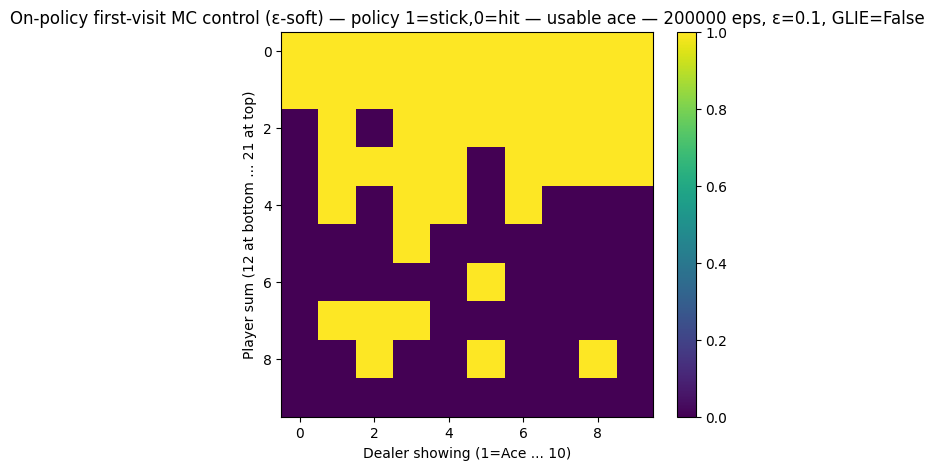

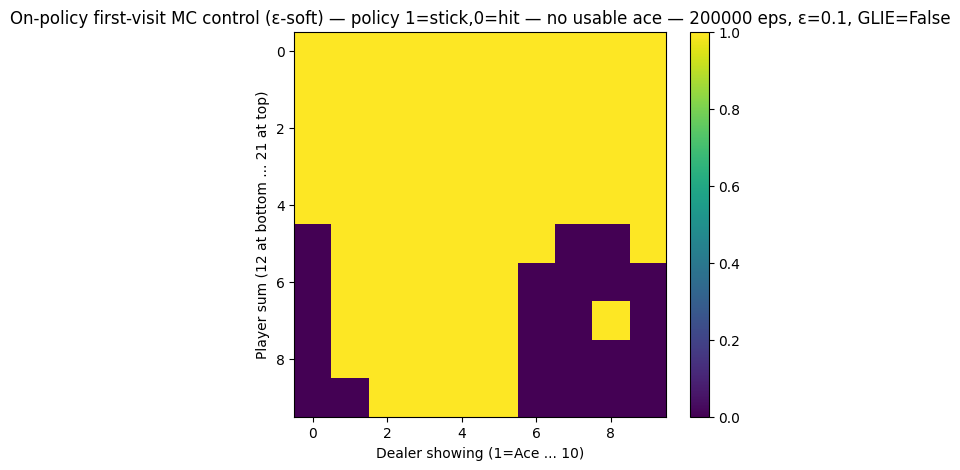

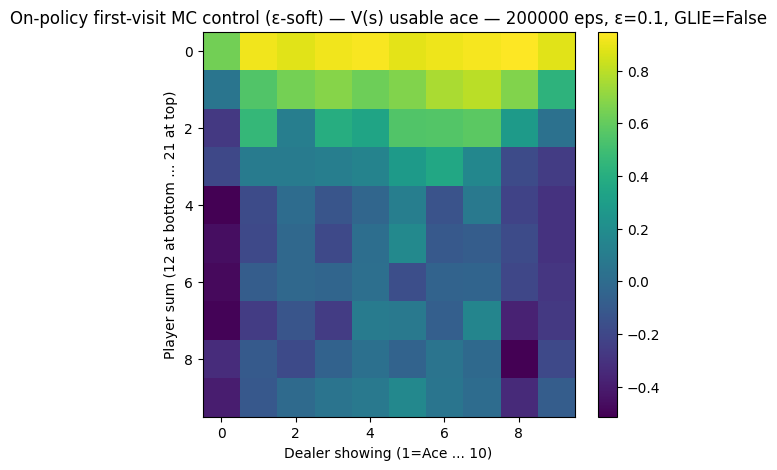

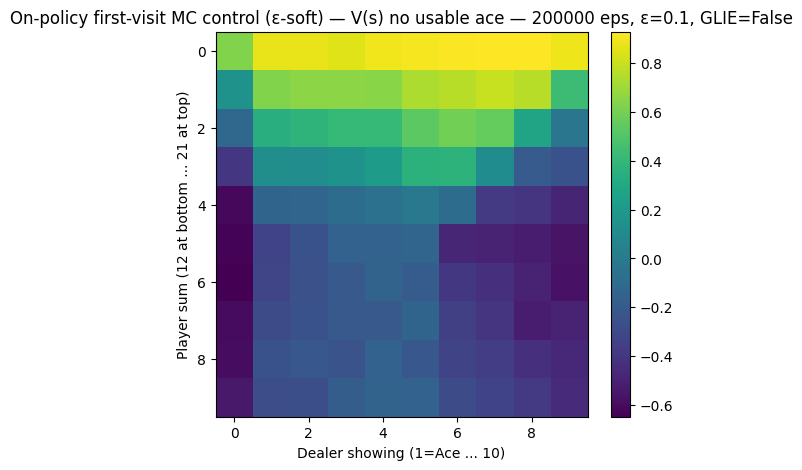

In [5]:
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Blackjack environment
# -----------------------------
def draw_card():
    r = random.randint(1, 13)
    if r == 1:
        return 1                  
    elif 2 <= r <= 10:
        return r
    else:
        return 10                 

def usable_ace(hand):
    return 1 in hand and sum(hand) + 10 <= 21

def hand_value(hand):
    val = sum(hand)
    if 1 in hand and val + 10 <= 21:
        return val + 10
    return val

def is_bust(hand):
    return hand_value(hand) > 21

def dealer_policy(dealer_sum):
    return 'stick' if dealer_sum >= 17 else 'hit'

def step_player(player, action):
    if action == 'hit':
        player = player + [draw_card()]
        return player, is_bust(player)
    elif action == 'stick':
        return player, False
    else:
        raise ValueError("invalid action")

def play_dealer(dealer):
    while dealer_policy(hand_value(dealer)) == 'hit':
        dealer += [draw_card()]
    return dealer

def outcome(player, dealer):
    if is_bust(player):
        return -1
    if is_bust(dealer):
        return +1
    p, d = hand_value(player), hand_value(dealer)
    if p > d: return +1
    if p == d: return 0
    return -1

# -----------------------------
# Œµ-soft on-policy episode generator
# -----------------------------
ACTIONS = ('hit', 'stick')

def greedy_action_from_Q(Q, s):
    qh = Q.get((s, 'hit'), 0.0)
    qs = Q.get((s, 'stick'), 0.0)
    if qh > qs:
        return 'hit'
    if qs > qh:
        return 'stick'
    return random.choice(ACTIONS)

def epsilon_soft_action(Q, s, epsilon):
    greedy_a = greedy_action_from_Q(Q, s)
    if random.random() < (1.0 - epsilon):
        return greedy_a
    return random.choice(ACTIONS)           # ActionÏùÄ stick Í≥º hit ÎëòÏù¥Ï£†? |A|=2 Ïù¥ÎØÄÎ°ú, ÏàòÏãùÏùÑ Îî∞ÎùºÍ∞ÄÎ©¥ Í∞ÅÍ∞Å Œµ/2 ÏûÖÎãàÎã§.

def has_natural(hand):
    return (1 in hand) and (hand_value(hand) == 21)

def generate_episode_onpolicy_eps(Q, epsilon, seed=None):
    if seed is not None:
        random.seed(seed)
    player = [draw_card(), draw_card()]
    dealer = [draw_card(), draw_card()]
    dealer_up = dealer[0]

    if has_natural(player):
        if has_natural(dealer):
            return [], 0
        else:
            return [], +1

    sa_seq = []
    while True:
        p_sum = hand_value(player)
        if p_sum < 12:
            player, bust = step_player(player, 'hit')
            if bust:
                return sa_seq, -1
            continue

        s = (p_sum, dealer_up, usable_ace(player))
        a = epsilon_soft_action(Q, s, epsilon) # Œµ-softÎ°ú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§. ESÏóêÏÑú ÏãúÏûëÏùÑ Ïñ¥ÎñªÍ≤å ÌñàÏßÄÏöî?
        sa_seq.append((s, a))

        if a == 'stick':
            break
        player, bust = step_player(player, 'hit')
        if bust:
            return sa_seq, -1

    dealer = play_dealer(dealer)
    R = outcome(player, dealer)
    return sa_seq, R

# -----------------------------
# On-policy first-visit MC control (Œµ-soft)
# -----------------------------
def onpolicy_first_visit_mc_control(n_episodes=200000, epsilon=0.1, glie=False, glie_c=50000, seed=7):
    random.seed(seed)
    Q = defaultdict(float)
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)

    for k in range(1, n_episodes + 1):
        eps_k = max(0.01, glie_c / (glie_c + k)) if glie else epsilon
        sa_seq, G = generate_episode_onpolicy_eps(Q, eps_k)

        visited = set()
        for (s, a) in sa_seq:
            if (s, a) in visited:
                continue
            visited.add((s, a))
            returns_sum[(s, a)] += G
            returns_count[(s, a)] += 1
            Q[(s, a)] = returns_sum[(s, a)] / returns_count[(s, a)]
        # Policy improvement is implicit: subsequent episodes sample Œµ-soft wrt updated Q
    return Q

# -----------------------------
# Derive V and a deterministic policy for visualization
# -----------------------------
def derive_policy_from_Q(Q):
    policy = {}
    for ps in range(12, 22):
        for ds in range(1, 11):
            for ua in (False, True):
                s = (ps, ds, ua)
                qh = Q.get((s, 'hit'), None)
                qs = Q.get((s, 'stick'), None)
                if qh is None and qs is None:
                    continue
                if (qh or 0.0) >= (qs or 0.0):
                    policy[s] = 'hit'
                else:
                    policy[s] = 'stick'
    return policy

def V_from_Q(Q):
    V = {}
    for (s, a), val in Q.items():
        cur = V.get(s, None)
        if cur is None or val > cur:
            V[s] = val
    return V

# -----------------------------
# Grids and simple heatmaps
# -----------------------------
def grid_policy(policy, usable=True):
    grid = np.full((10, 10), np.nan)
    for ps in range(12, 22):
        for ds in range(1, 11):
            s = (ps, ds, usable)
            if s in policy:
                grid[ps - 12, ds - 1] = 1 if policy[s] == 'stick' else 0
    return grid

def grid_value(V, usable=True):
    grid = np.full((10, 10), np.nan)
    for ps in range(12, 22):
        for ds in range(1, 11):
            s = (ps, ds, usable)
            if s in V:
                grid[ps - 12, ds - 1] = V[s]
    return grid

def show_heatmap(grid, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(np.flipud(grid), aspect='auto')
    plt.title(title)
    plt.xlabel('Dealer showing (1=Ace ... 10)')
    plt.ylabel('Player sum (12 at bottom ... 21 at top)')
    plt.colorbar()
    plt.show()

# -----------------------------
# Train and visualize
# -----------------------------
EPISODES   = 200_000     # increase for smoother surfaces
EPSILON    = 0.1         # fixed Œµ for Œµ-soft behavior
USE_GLIE   = False       # set True to use GLIE schedule Œµ_k = c/(c+k)
GLIE_CONST = 50_000

Q_eps = onpolicy_first_visit_mc_control(n_episodes=EPISODES,
                                        epsilon=EPSILON,
                                        glie=USE_GLIE,
                                        glie_c=GLIE_CONST,
                                        seed=7)
policy_eps = derive_policy_from_Q(Q_eps)
V_eps = V_from_Q(Q_eps)

pol_ua = grid_policy(policy_eps, usable=True)
pol_nua = grid_policy(policy_eps, usable=False)
V_ua = grid_value(V_eps, usable=True)
V_nua = grid_value(V_eps, usable=False)

show_heatmap(pol_ua, f'On-policy first-visit MC control (Œµ-soft) ‚Äî policy 1=stick,0=hit ‚Äî usable ace ‚Äî {EPISODES} eps, Œµ={EPSILON}, GLIE={USE_GLIE}')
show_heatmap(pol_nua, f'On-policy first-visit MC control (Œµ-soft) ‚Äî policy 1=stick,0=hit ‚Äî no usable ace ‚Äî {EPISODES} eps, Œµ={EPSILON}, GLIE={USE_GLIE}')
show_heatmap(V_ua, f'On-policy first-visit MC control (Œµ-soft) ‚Äî V(s) usable ace ‚Äî {EPISODES} eps, Œµ={EPSILON}, GLIE={USE_GLIE}')
show_heatmap(V_nua, f'On-policy first-visit MC control (Œµ-soft) ‚Äî V(s) no usable ace ‚Äî {EPISODES} eps, Œµ={EPSILON}, GLIE={USE_GLIE}')

### 4. Off-policy MC prediction (policy evaluation) for estimating ùëÑ ‚âà $q_\pi$

Ï≤òÏùåÏúºÎ°ú Ìï¥Î≥¥Îäî Off-policy Î∞©Î≤ïÏûÖÎãàÎã§. Target policy $pi$ÏôÄ behavior policy $b$Î°ú Íµ¨ÏÑ±Ìï©ÎãàÎã§. ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÎ©¥ ÏïÑÎßàÎèÑ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏùòÎ¨∏Ïù¥ ÏÉùÍ∏∏ Í±∞ÏòàÏöî. 

  "ÍµêÏàòÎãòÏù¥ target policyÎ•º ÍµêÏàòÎãòÏù¥ ÌïôÏäµÌïúÎã§Í≥† ÌñàÎäîÎç∞, behavior policyÎäî Í∑∏Îüº Ïñ¥ÎñªÍ≤å ÌïòÎäîÎç∞?"
  "Behavior policyÎäî ÌïôÏäµÏù¥ Ï†ÑÌòÄ Ïïà ÎêòÎÇò?" 

Î≥∏Ïù∏Ïùò ÏΩîÎìúÏôÄ Ìï®Íªò ÏïÑÎûò ÌëúÎ•º Ïö∞ÏÑ† Î¥ÖÏãúÎã§. 

| Ìï≠Î™©             | Target Policy (œÄ)                                  | Behavior Policy (b)                          |
|------------------|----------------------------------------------------|-----------------------------------------------|
| Î™©Ï†Å             | Ï∂îÏ†ïÌïòÍ≥†Ïûê ÌïòÎäî Ï†ïÏ±Ö(Ï†ïÏ±Ö ÌèâÍ∞Ä ÎòêÎäî Í∞úÏÑ† ÎåÄÏÉÅ)    | Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî Ï†ïÏ±Ö(ÏÉòÌîå ÏóêÌîºÏÜåÎìú ÏÉùÏÑ±Ïö©) |
| ÏÑ§Ï†ï ÏúÑÏπò        | ÌïôÏäµ Î™©ÌëúÎ°ú Î™ÖÏãúÎê®                                 | ÏóêÌîºÏÜåÎìú ÏÉùÏÑ± Ïãú ÏÇ¨Ïö©Îê®                       |
| ÎèôÏûë Î∞©Ïãù        | ÏùºÎ∞òÏ†ÅÏúºÎ°ú deterministic ÎòêÎäî Œµ-softÎ°ú ÏßÄÏ†ï        | Î≥¥ÌÜµ random ÎòêÎäî soft Ï†ïÏ±Ö                    |
| Ï†ïÏ±Ö Í∞úÏÑ† Ïó¨Î∂Ä   | ÌïôÏäµ Ï§ë Î∞îÎÄåÍ∏∞ÎèÑ Ìï® (controlÏùò Í≤ΩÏö∞) ÌòπÏùÄ Í≥†Ï†ïÎê® (predictionÎßå Ìï† Í≤ΩÏö∞) | Î≥¥ÌÜµ Í≥†Ï†ïÎê®. Off-policyÏóêÏÑúÎäî Î∞îÎÄåÏßÄ ÏïäÏùå      |
| ÏòàÏãú             | ‚Äúplayer sum ‚â• 20Ïù¥Î©¥ stick‚Äù                        | ‚ÄúhitÍ≥º stickÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉù‚Äù                 |

ÏïÑÎßàÎèÑ Ïó¨Îü¨Î∂ÑÏù¥ ÏÉùÏÑ±Ìòï AIÏùò ÎèÑÏõÄÏùÑ Î∞õÏïÑ ÎßåÎì§ÏóàÎã§Î©¥, $\pi$Îäî Îëò Ï§ë ÌïòÎÇòÏùº Í±∞ÏòàÏöî. Deterministic, Í∑∏Îü¨ÎãàÍπå Í∞ÄÏû• Ï≤òÏùåÏóê Î≥∏ ÏïåÍ≥†Î¶¨Ï¶òÏ≤òÎüº "fixed policy"Í±∞ÎÇò $\varepsilon$-soft Ïù¥Í±∞ÎÇò. 

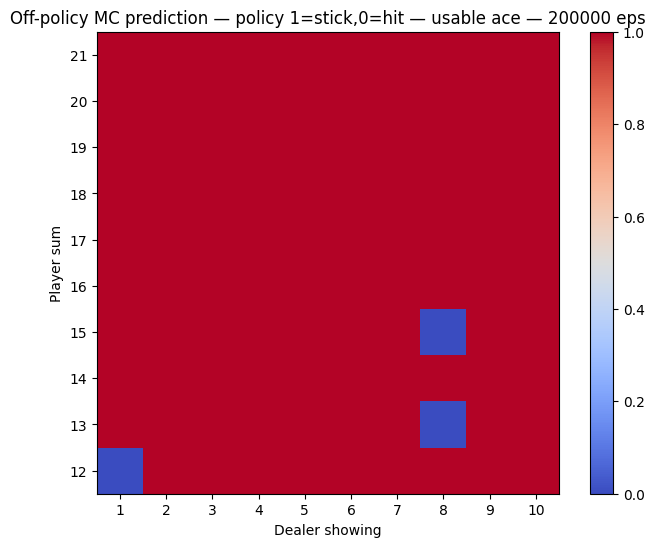

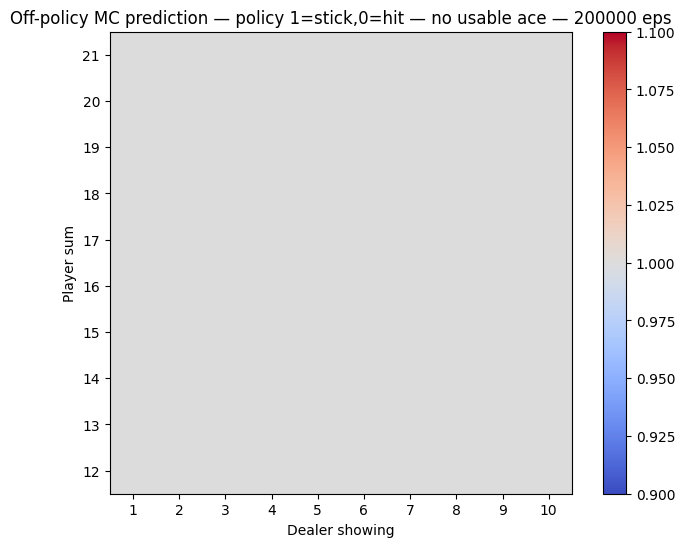

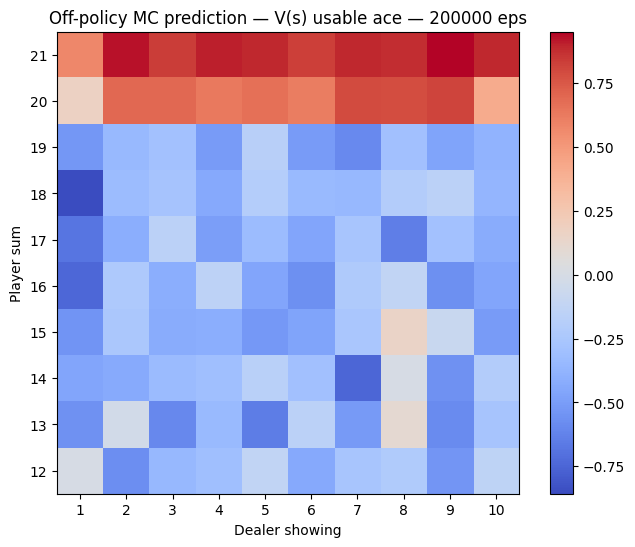

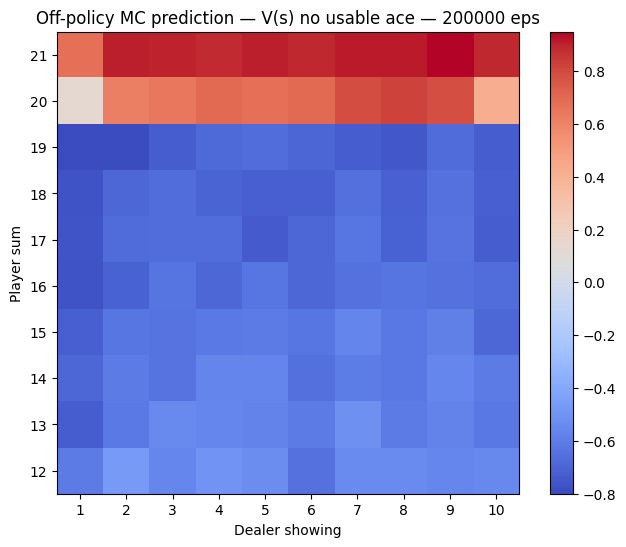

In [ ]:
# -----------------------------
# Off-policy MC prediction (Importance Sampling)
# -----------------------------
def target_policy(s):
    return 'stick' if s[0] >= 20 else 'hit' # fixed target policy Î°ú ÏûëÏÑ±Ìïú ÏΩîÎìúÏûÖÎãàÎã§. 

def behavior_policy():
    return random.choice(ACTIONS)

def generate_episode_behavior():
    player = [draw_card(), draw_card()]
    dealer = [draw_card(), draw_card()]
    dealer_up = dealer[0]

    if has_natural(player):
        if has_natural(dealer):
            return [], 0
        else:
            return [], +1

    episode = []
    while True:
        p_sum = hand_value(player)
        if p_sum < 12:
            player, bust = step_player(player, 'hit')
            if bust:
                return episode, -1
            continue

        s = (p_sum, dealer_up, usable_ace(player))
        a = behavior_policy()
        episode.append((s, a))

        if a == 'stick':
            break
        player, bust = step_player(player, 'hit')
        if bust:
            return episode, -1

    dealer = play_dealer(dealer)
    R = outcome(player, dealer)
    return episode, R

def off_policy_mc_prediction(n_episodes=200_000):
    Q = defaultdict(float)
    C = defaultdict(float)

    for _ in range(n_episodes):
        episode, G = generate_episode_behavior()
        W = 1.0

        for (s, a) in reversed(episode):
            if a != target_policy(s):
                break
            C[(s, a)] += W
            Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
            W *= 1.0 / 0.5  # behavior policy is uniform

    return Q

# -----------------------------
# Ïã§Ìñâ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------
Q_off = off_policy_mc_prediction(EPISODES)
policy_off = derive_policy_from_Q(Q_off)
V_off = V_from_Q(Q_off)

pol_ua = grid_policy(policy_off, usable=True)
pol_nua = grid_policy(policy_off, usable=False)
V_ua = grid_value(V_off, usable=True)
V_nua = grid_value(V_off, usable=False)

show_heatmap(pol_ua, f'Off-policy MC prediction ‚Äî policy 1=stick,0=hit ‚Äî usable ace ‚Äî {EPISODES} eps')
show_heatmap(pol_nua, f'Off-policy MC prediction ‚Äî policy 1=stick,0=hit ‚Äî no usable ace ‚Äî {EPISODES} eps')
show_heatmap(V_ua, f'Off-policy MC prediction ‚Äî V(s) usable ace ‚Äî {EPISODES} eps')
show_heatmap(V_nua, f'Off-policy MC prediction ‚Äî V(s) no usable ace ‚Äî {EPISODES} eps')

Ïù¥Î≤àÏóêÎäî $\varepsilon$-soft policy Î•º ÏÇ¨Ïö©ÌïòÎèÑÎ°ù Î∞îÍøî Î¥ÖÏãúÎã§. 

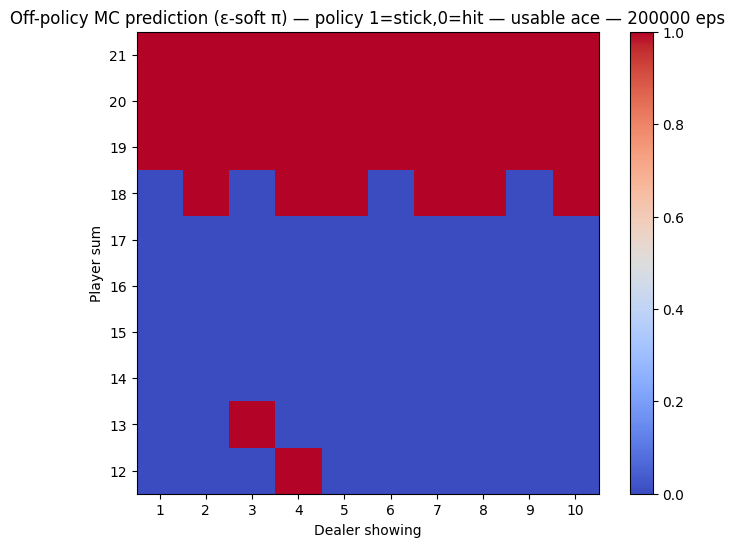

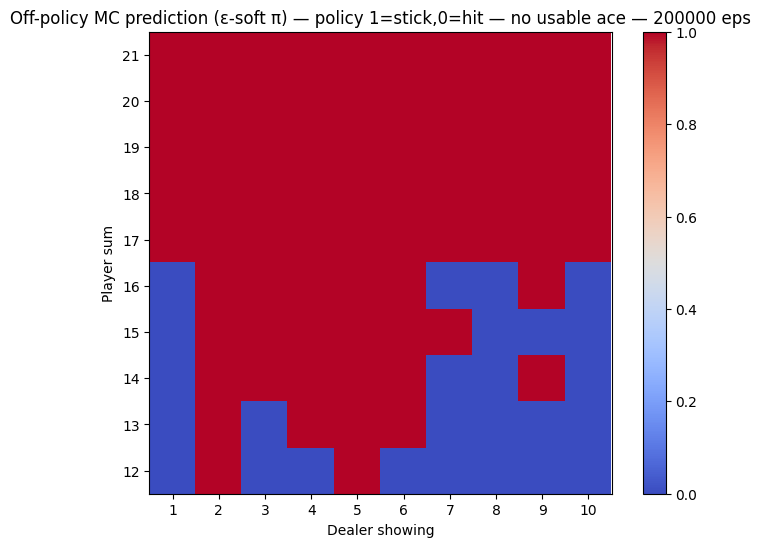

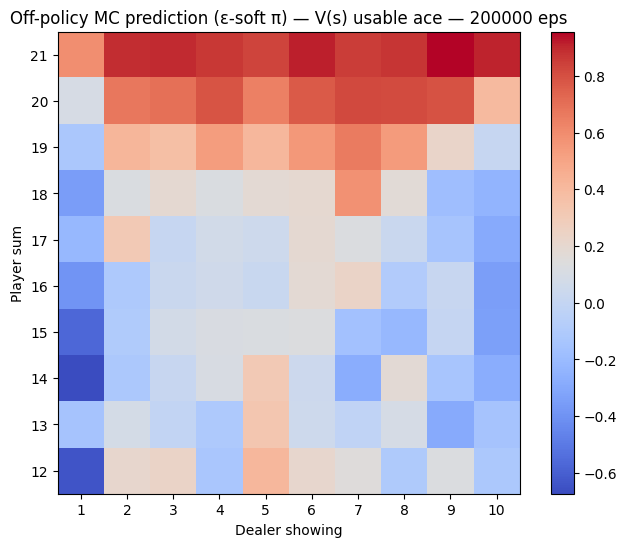

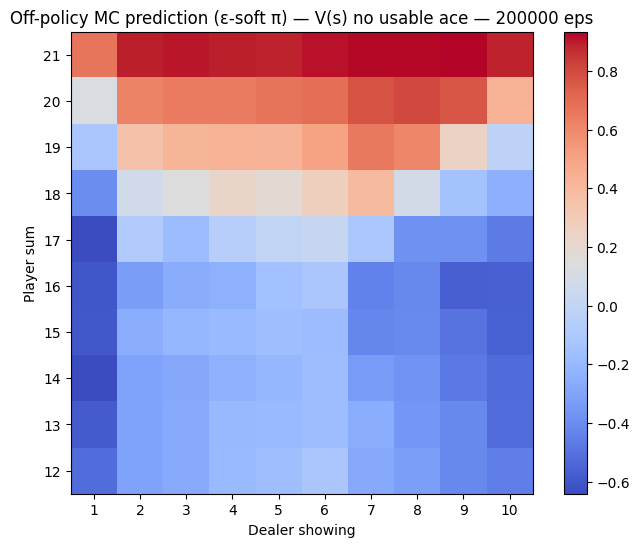

In [ ]:
def epsilon_soft_pi_prob(Q, s, a, epsilon=0.1):
    greedy = greedy_action_from_Q(Q, s)
    if a == greedy:
        return 1 - epsilon + epsilon / 2
    else:
        return epsilon / 2

def off_policy_mc_prediction_soft(n_episodes=200_000, epsilon=0.1):
    Q = defaultdict(float)
    C = defaultdict(float)

    for _ in range(n_episodes):
        episode, G = generate_episode_behavior()
        W = 1.0

        for (s, a) in reversed(episode):
            pi = epsilon_soft_pi_prob(Q, s, a, epsilon) # target policyÎäî Ï£ºÏñ¥ÏßÑ policy Î•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏßÄ ÏïäÏïÑÏöî. Îã§ÏùåÏóê Î≥º ControlÍ≥º Îã§Î¶ÖÎãàÎã§.
            if pi == 0:
                break
            C[(s, a)] += W
            Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
            W *= pi / 0.5  # behavior policy is uniform random

    return Q

Q_off_soft = off_policy_mc_prediction_soft(EPISODES, EPSILON)
policy_off_soft = derive_policy_from_Q(Q_off_soft)
V_off_soft = V_from_Q(Q_off_soft)

pol_ua = grid_policy(policy_off_soft, usable=True)
pol_nua = grid_policy(policy_off_soft, usable=False)
V_ua = grid_value(V_off_soft, usable=True)
V_nua = grid_value(V_off_soft, usable=False)

show_heatmap(pol_ua, f'Off-policy MC prediction (Œµ-soft œÄ) ‚Äî policy 1=stick,0=hit ‚Äî usable ace ‚Äî {EPISODES} eps')
show_heatmap(pol_nua, f'Off-policy MC prediction (Œµ-soft œÄ) ‚Äî policy 1=stick,0=hit ‚Äî no usable ace ‚Äî {EPISODES} eps')
show_heatmap(V_ua, f'Off-policy MC prediction (Œµ-soft œÄ) ‚Äî V(s) usable ace ‚Äî {EPISODES} eps')
show_heatmap(V_nua, f'Off-policy MC prediction (Œµ-soft œÄ) ‚Äî V(s) no usable ace ‚Äî {EPISODES} eps')

### 5. Off-policy MC Control

ÏúÑ ÏïåÍ≥†Î¶¨Ï¶ò Off-policy MC PredictionÏù¥ "Ïù¥ Ï†ïÏ±Ö $\pi$Í∞Ä ÏñºÎßàÎÇò Ï¢ãÏùÄÍ∞Ä?"Î•º ÌèâÍ∞ÄÌïòÎäîÎç∞ Î™©Ï†ÅÏù¥ ÏûàÎã§Î©¥, Ïù¥Ï†ú "Ïñ¥ÎñªÍ≤å ÌïòÎ©¥ Îçî ÎÇòÏùÄ Ï†ïÏ±ÖÏùÑ ÎßåÎì§ Ïàò ÏûàÏùÑÍπå?"Î•º ÏÉùÍ∞ÅÌï¥ Î¥ÖÏãúÎã§. Off-polichy MC PredictionÏùÄ $\varepsilon$-soft Ï†ïÏ±ÖÏùÑ Í∑∏ÎåÄÎ°ú ÎëêÍ≥† Í∑∏Ïóê ÎåÄÌïú QÎ•º Ï∂îÏ†ïÏùÑ ÌñàÍ≥†, Ïù¥Î≤àÏóêÎäî $\varepsilon$-softÎ•º targetÏúºÎ°ú ÏÇºÎçîÎùºÎèÑ, Ï†ïÏ±ÖÏùÑ Í≥ÑÏÜç Î≥ÄÌôîÏãúÏºúÏÑú QÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞úÏÑ†Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú $\varepsilon$-soft policyÍ∞Ä $Q(s,a)$Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏ ÎêòÎ©¥ Îã§Ïãú Ï†ïÏùòÎ•º ÌïòÍ≥†, Í≤∞Íµ≠ greedyÏóê Í∞ÄÍπåÏö¥ Ï†ïÏ±ÖÏù¥ ÎßåÎì§Ïñ¥ÏßëÎãàÎã§. 

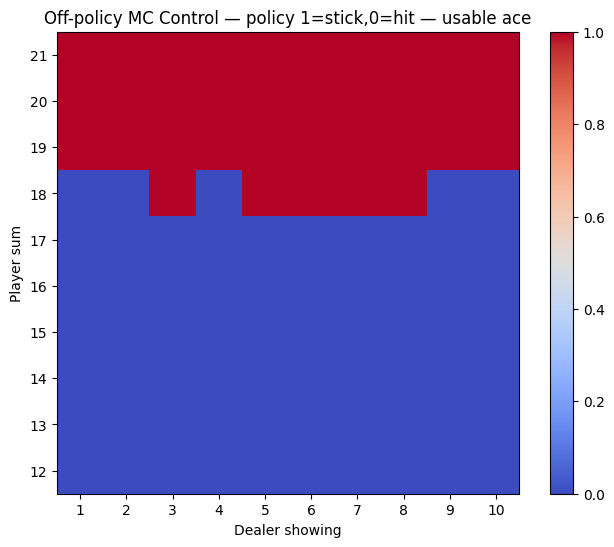

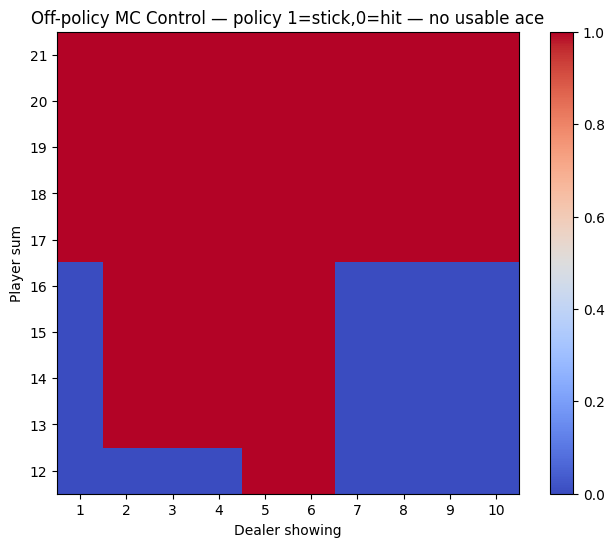

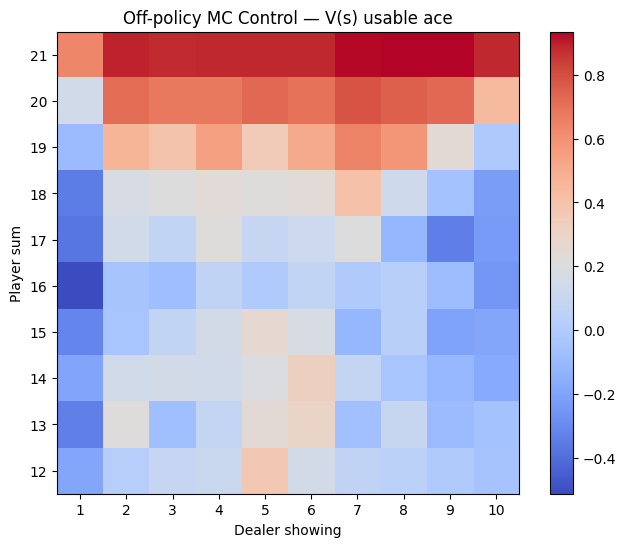

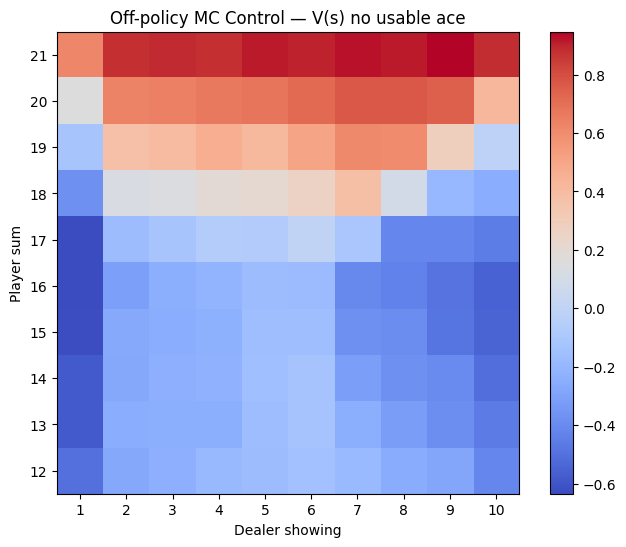

In [ ]:
def off_policy_mc_control(n_episodes=500_000):
    Q = defaultdict(float)
    C = defaultdict(float)
    policy = {}

    for _ in range(n_episodes):
        episode = []
        player = [draw_card(), draw_card()]
        dealer = [draw_card(), draw_card()]
        dealer_up = dealer[0]

        while True:
            p_sum = hand_value(player)
            if p_sum < 12:
                player, bust = step_player(player, 'hit')
                if bust:
                    episode.append(((None, None, None), None, -1))
                    break
                continue

            s = (p_sum, dealer_up, usable_ace(player))
            a = random.choice(ACTIONS)
            episode.append((s, a, None))

            if a == 'stick':
                break
            player, bust = step_player(player, 'hit')
            if bust:
                episode[-1] = (s, a, -1)
                break

        if episode[-1][2] is None:
            dealer = play_dealer(dealer)
            R = outcome(player, dealer)
            episode = [(s, a, R) for (s, a, _) in episode]
        else:
            R = episode[-1][2]

        G = R
        W = 1.0

        for (s, a, _) in reversed(episode):
            if s == (None, None, None):
                continue
            C[(s, a)] += W
            Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])
            policy[s] = 'hit' if Q.get((s, 'hit'), 0.0) >= Q.get((s, 'stick'), 0.0) else 'stick' # Ïù¥Î∂ÄÎ∂ÑÏù¥ Off-policy MC predictionÍ≥º Îã§Î•∏ Î∂ÄÎ∂ÑÏûÖÎãàÎã§.
            if a != policy[s]:
                break
            W *= 1.0 / 0.5

    return Q, policy

Q_off_control, policy_off_control = off_policy_mc_control(500_000)
V_off_control = V_from_Q(Q_off_control)

pol_ua_off_control = grid_policy(policy_off_control, usable=True)
pol_nua_off_control = grid_policy(policy_off_control, usable=False)
V_ua_off_control = grid_value(V_off_control, usable=True)
V_nua_off_control = grid_value(V_off_control, usable=False)

show_heatmap(pol_ua_off_control, 'Off-policy MC Control ‚Äî policy 1=stick,0=hit ‚Äî usable ace')
show_heatmap(pol_nua_off_control, 'Off-policy MC Control ‚Äî policy 1=stick,0=hit ‚Äî no usable ace')
show_heatmap(V_ua_off_control, 'Off-policy MC Control ‚Äî V(s) usable ace')
show_heatmap(V_nua_off_control, 'Off-policy MC Control ‚Äî V(s) no usable ace')

Î∞©Í∏à ÏΩîÎìúÎäî greedy ÌïòÍ≤å Ï†ïÏ±ÖÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÏòÄÏäµÎãàÎã§. Ïù¥Î≤àÏóêÎäî $\varepsilon$-softÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ≤†ÏäµÎãàÎã§. ÏΩîÎìúÍ∞Ä Ï°∞Í∏à ÎßéÏù¥ Î∞îÎÄåÎäîÎç∞, Ï∞∏Í≥†Î°ú Î¥ê Ï£ºÏÑ∏Ïöî. 

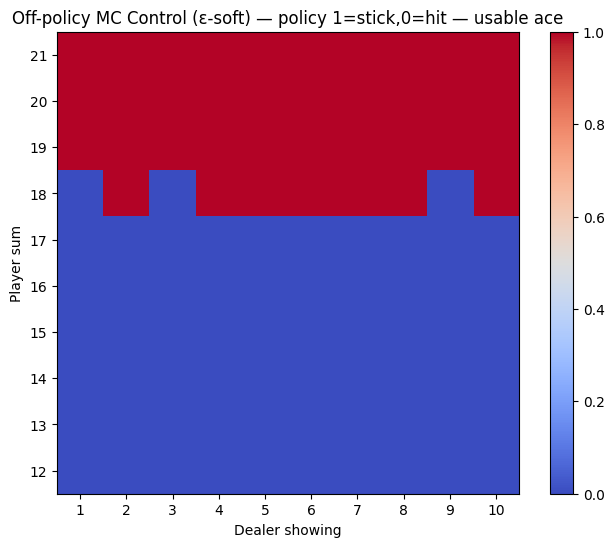

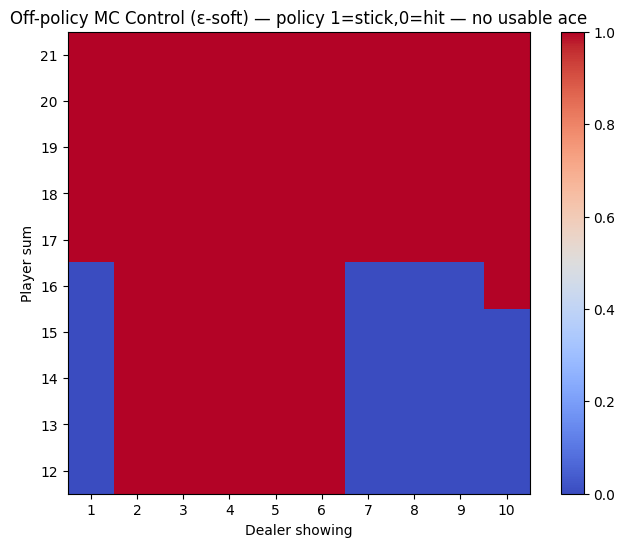

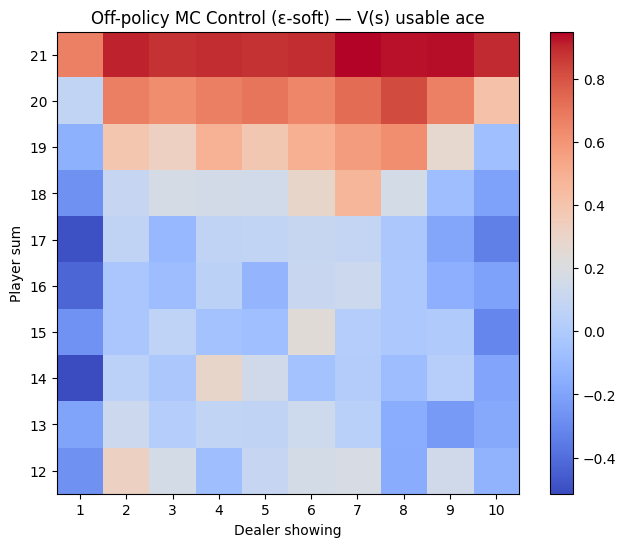

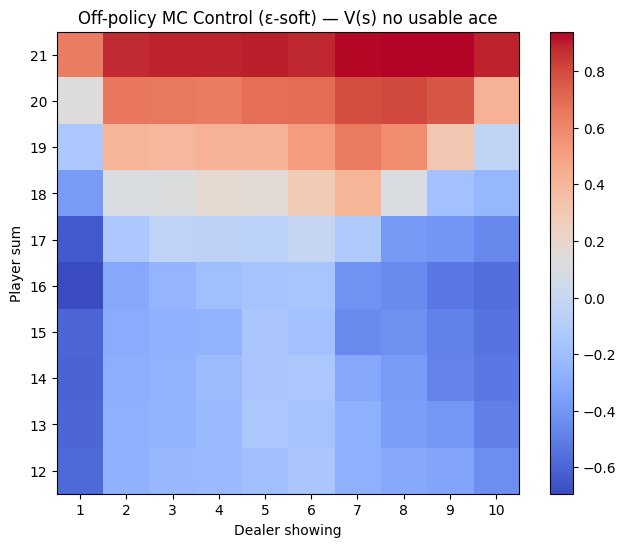

In [19]:
def off_policy_mc_control_eps(n_episodes=500_000, epsilon=0.1):
    Q = defaultdict(float)
    C = defaultdict(float)
    policy = {}

    for _ in range(n_episodes):
        episode = []
        player = [draw_card(), draw_card()]
        dealer = [draw_card(), draw_card()]
        dealer_up = dealer[0]

        while True:
            p_sum = hand_value(player)
            if p_sum < 12:
                player, bust = step_player(player, 'hit')
                if bust:
                    episode.append(((None, None, None), None, -1))
                    break
                continue

            s = (p_sum, dealer_up, usable_ace(player))
            a = random.choice(ACTIONS)
            episode.append((s, a, None))

            if a == 'stick':
                break
            player, bust = step_player(player, 'hit')
            if bust:
                episode[-1] = (s, a, -1)
                break

        if episode[-1][2] is None:
            dealer = play_dealer(dealer)
            R = outcome(player, dealer)
            episode = [(s, a, R) for (s, a, _) in episode]
        else:
            R = episode[-1][2]

        G = R
        W = 1.0

        for (s, a, _) in reversed(episode):
            if s == (None, None, None):
                continue

            C[(s, a)] += W
            Q[(s, a)] += (W / C[(s, a)]) * (G - Q[(s, a)])

            # Œµ-soft policy update
            qh = Q.get((s, 'hit'), 0.0)
            qs = Q.get((s, 'stick'), 0.0)
            greedy_a = 'hit' if qh >= qs else 'stick'

            policy[s] = {}
            for act in ACTIONS:
                policy[s][act] = epsilon / len(ACTIONS)
            policy[s][greedy_a] += 1.0 - epsilon

            # importance sampling ratio
            pi_a = policy[s].get(a, 0.0)
            if pi_a == 0.0:
                break
            W *= pi_a / 0.5

    return Q, policy

# Ï†ïÏ±ÖÏùÑ Œµ-softÎ°úÎ∂ÄÌÑ∞ Í≤∞Ï†ïÏ†ÅÏù∏ ÌòïÌÉúÎ°ú Î≥ÄÌôò (Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÌñâÎèô ÏÑ†ÌÉù)
def extract_deterministic_policy(policy_eps):
    deterministic_policy = {}
    for s, action_probs in policy_eps.items():
        deterministic_policy[s] = max(action_probs.items(), key=lambda x: x[1])[0]
    return deterministic_policy

Q_eps_off, policy_eps_soft = off_policy_mc_control_eps(n_episodes=500_000, epsilon=0.1)
policy_eps_det = extract_deterministic_policy(policy_eps_soft)
V_eps_off = V_from_Q(Q_eps_off)

pol_ua = grid_policy(policy_eps_det, usable=True)
pol_nua = grid_policy(policy_eps_det, usable=False)
V_ua = grid_value(V_eps_off, usable=True)
V_nua = grid_value(V_eps_off, usable=False)

show_heatmap(pol_ua, 'Off-policy MC Control (Œµ-soft) ‚Äî policy 1=stick,0=hit ‚Äî usable ace')
show_heatmap(pol_nua, 'Off-policy MC Control (Œµ-soft) ‚Äî policy 1=stick,0=hit ‚Äî no usable ace')
show_heatmap(V_ua, 'Off-policy MC Control (Œµ-soft) ‚Äî V(s) usable ace')
show_heatmap(V_nua, 'Off-policy MC Control (Œµ-soft) ‚Äî V(s) no usable ace')

### ÌïôÏÉù ÏΩîÎìú ÏòàÏãú

Off-policy MC prediction ÏΩîÎìú Ï§ë Ìïú ÌïôÏÉùÏùò ÏΩîÎìúÏûÖÎãàÎã§. Ïù¥ ÏΩîÎìúÎäî ÍµêÏû¨ ÏïåÍ≥†Î¶¨Ï¶òÍ≥º Îã§Î¶ÖÎãàÎã§. Ïñ¥ÎñªÍ≤å Îã§Î•ºÍπåÏöî? 

In [7]:
# -----------------------------
# Define Œµ-soft target policy from Q_eps
# -----------------------------
def epsilon_soft_target_policy(Q, s, epsilon=0.1):
    qh = Q.get((s, 'hit'), 0.0)
    qs = Q.get((s, 'stick'), 0.0)
    probs = {'hit': epsilon / 2, 'stick': epsilon / 2}
    if qh > qs:
        probs['hit'] += 1 - epsilon
    else:
        probs['stick'] += 1 - epsilon
    return probs  # returns a probability distribution over actions

# -----------------------------
# Generate episode under behavior policy (uniform random)
# -----------------------------
def generate_episode_behavior_policy_for_eps_target():
    player = [draw_card(), draw_card()]
    dealer = [draw_card(), draw_card()]
    dealer_up = dealer[0]

    episode = []
    while True:
        p_sum = hand_value(player)
        if p_sum < 12:
            player, bust = step_player(player, 'hit')
            if bust:
                return episode, -1
            continue

        s = (p_sum, dealer_up, usable_ace(player))
        a = random.choice(ACTIONS)  # behavior policy: uniform random
        episode.append((s, a))

        if a == 'stick':
            break
        player, bust = step_player(player, 'hit')
        if bust:
            return episode, -1

    dealer = play_dealer(dealer)
    R = outcome(player, dealer)
    return episode, R

# -----------------------------
# Off-policy MC prediction using Œµ-soft target policy
# -----------------------------
def off_policy_mc_prediction_eps_soft_target(Q_target, epsilon=0.1, n_episodes=500000):
    Q = defaultdict(float)
    C = defaultdict(float)

    for _ in range(n_episodes):
        episode, G = generate_episode_behavior_policy_for_eps_target()
        W = 1.0

        for t in reversed(range(len(episode))):
            s, a = episode[t]
            pi_probs = epsilon_soft_target_policy(Q_target, s, epsilon)
            pi_a = pi_probs.get(a, 0.0)
            if pi_a == 0:
                break  
            C[(s, a)] += W
            Q[(s, a)] += W * G
            W *= pi_a / 0.5  

    for (s, a) in Q:
        Q[(s, a)] /= C[(s, a)]

    return Q

Q_eps_target = Q_eps  
Q_off_eps_target = off_policy_mc_prediction_eps_soft_target(Q_eps_target, epsilon=EPSILON, n_episodes=500000)

# -----------------------------
# Derive policy and V(s) from Q
# -----------------------------
policy_off_eps = derive_policy_from_Q(Q_off_eps_target)
V_off_eps = V_from_Q(Q_off_eps_target)